In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/1332faces.zip' -d '/content/imgData'

In [6]:
from PIL import Image
import numpy as np
import glob

In [ ]:
cwd = '/content/imgData/dataset'
image_list_part1 = []
data_list = []
for filename in glob.glob(cwd + "//0001-3000//*.jpg"):
    im = Image.open(filename)
    image_list_part1.append(im)    
    data_list.append(np.asarray(im))

# image_list_part2 = []
# for filename in glob.glob(cwd + "//3001-6000//*.jpg"):
#     im = Image.open(filename)
#     image_list_part2.append(im)
#     print(im.size)
#     data_list.append(np.asarray(im))

# image_list_part3 = []
# for filename in glob.glob(cwd + "//6001-9000//*.jpg"):
#     im = Image.open(filename)
#     image_list_part3.append(im)
#     print(im.size)
#     data_list.append(np.asarray(im))

# image_list_part4 = []
# for filename in glob.glob(cwd + "//9001-13322//*.jpg"):
#     im = Image.open(filename)
#     image_list_part4.append(im)
#     print(im.size)
#     data_list.append(np.asarray(im))

In [72]:

# You just need to compare the aspect ratios - depending on which is larger, that will tell you whether to chop off the sides or the top and bottom. e.g. how about:

def resizeImg(image, ideal_width, ideal_height):
  width  = image.size[0]
  height = image.size[1]
  aspect = width / float(height)
  ideal_aspect = ideal_width / float(ideal_height)
  if aspect > ideal_aspect:
      # Then crop the left and right edges:
      new_width = int(ideal_aspect * height)
      offset = (width - new_width) / 2
      resize = (offset, 0, width - offset, height)
  else:
      # ... crop the top and bottom:
      new_height = int(width / ideal_aspect)
      offset = (height - new_height) / 2
      resize = (0, offset, width, height - offset)
  thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
  return thumb
  
# 灰階轉換公式
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x382 at 0x7F4CBF15C198>


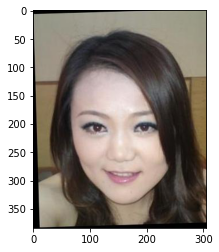

In [93]:
print(image_list_part1[0])
plt.imshow(image_list_part1[2])

In [95]:
trainX = []
for img in image_list_part1:
  img = resizeImg(image = img, ideal_width = 64, ideal_height = 64)
  image_sequence = img.getdata()
  image_array = np.array(image_sequence)
  trainX.append(rgb2gray(image_array)/255) # normalize to 0 ~ 1
arr = np.array(trainX)
print(arr.shape)

(3000, 4096)


[[0.01216863 0.25392941 0.32110588 ... 0.30718824 0.30218431 0.30267451]
 [0.79043529 0.9238549  0.90149804 ... 0.10144706 0.09590588 0.10541176]
 [0.40823137 0.60533725 0.5721098  ... 0.14596078 0.34581961 0.38955686]
 ...
 [0.59565098 0.8349098  0.79803922 ... 0.85176863 0.85176863 0.85176863]
 [0.43694902 0.43347451 0.42955294 ... 0.00622353 0.00558431 0.00347451]
 [0.         0.         0.         ... 0.6146     0.64796863 0.42896471]]


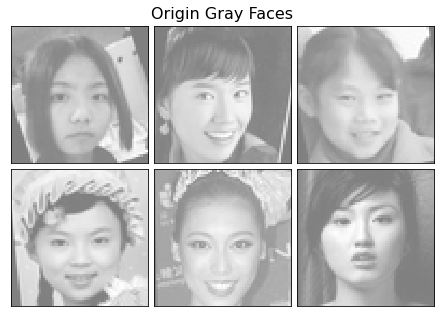

In [100]:
imgIndex = 9
plot_gallery("Origin Gray Faces", arr[imgIndex:imgIndex + 6])
print(arr)

In [58]:
from sklearn import decomposition
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from numpy.random import RandomState
from time import time
import logging

In [59]:
# faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,random_state=RandomState(0))
# n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


<class 'numpy.ndarray'>
(400, 4096)
4096
[0.6694215  0.6363636  0.6487603  ... 0.08677686 0.08264463 0.07438017]
400


In [37]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [75]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,random_state=rng)
# faces = arr
n_samples, n_features = faces.shape
print(faces.shape)

(400, 4096)


[0.6694215  0.6363636  0.6487603  ... 0.08677686 0.08264463 0.07438017]


In [76]:
# global centering
faces_centered = faces - faces.mean(axis=0)

In [77]:
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


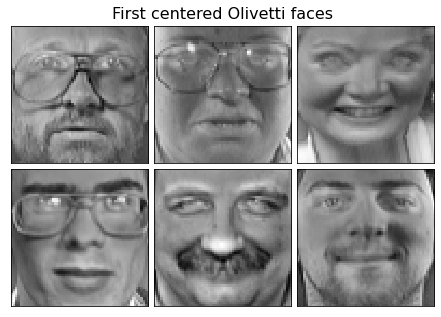

In [78]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

In [73]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
     True),
]